In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.layers import Dense, Flatten, Dropout
from keras.models import Model
from keras.utils import to_categorical
from keras.applications import VGG16
from keras.optimizers import SGD

In [3]:
# Load the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Load the VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers in the VGG16 model
for layer in vgg16.layers:
    layer.trainable = False

# Add new classification layers on top of the frozen layers
x = vgg16.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=vgg16.input, outputs=predictions)

# Compile the model
model.compile(optimizer=SGD(lr=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the CIFAR10 dataset
model.fit(x_train, y_train, batch_size=32, epochs=2, validation_data=(x_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', accuracy)

Epoch 1/2
1563/1563 [==============================] - 782s 500ms/step - loss: 1.8626 - accuracy: 0.3395 - val_loss: 1.5756 - val_accuracy: 0.4615
Epoch 2/2
1563/1563 [==============================] - 772s 494ms/step - loss: 1.5796 - accuracy: 0.4459 - val_loss: 1.4488 - val_accuracy: 0.4982
Test accuracy: 0.498199999332428


1/1 [==============================] - 0s 53ms/step
Predicted class: bird


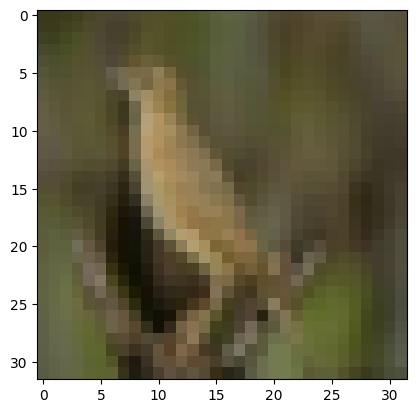

In [14]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Choose a random test image to predict
img_index = np.random.randint(0, x_test.shape[0])
test_img = x_test[img_index]

# Make the prediction
prediction = model.predict(np.array([test_img]))
predicted_class = np.argmax(prediction[0])

# Print the result
print("Predicted class:", class_names[predicted_class])
plt.imshow(test_img)